In [36]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [37]:
x = np.linspace(0, 100, 1001)[1:]

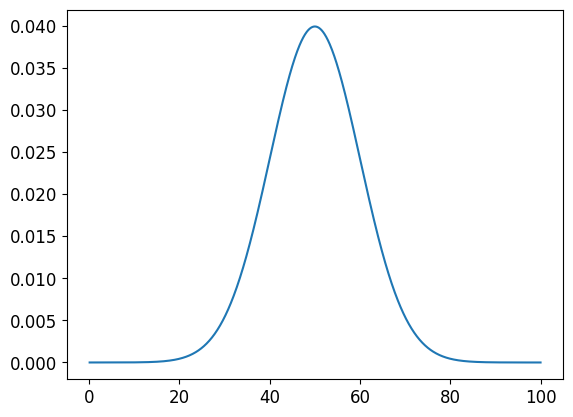

In [38]:
mu_p = 50
sig_p = 10
eta = 2.0
y_p = 1 / (sig_p*np.sqrt(2*np.pi)) * np.exp(-1/2 * (x-mu_p)**2 / sig_p**2)

plt.plot(x, y_p)

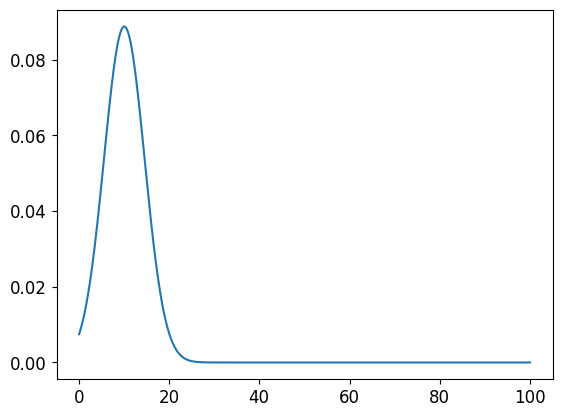

In [40]:
def gaussian_density(x, mu, sigma):
    return 1 / (np.sqrt(2*np.pi)*sigma) * np.exp(-1/2 * (x-mu)**2 / (sigma)**2)

def poisson_noise_gaussian_appr(x, mu_x, eta):
    sig_x = np.sqrt(eta * mu_x)
    y = 1 / (sig_x*np.sqrt(2*np.pi)) * np.exp(-1/2 * (x-mu_x)**2 / sig_x**2)
    return y

plt.plot(x, poisson_noise_gaussian_appr(x,x[100],eta))

In [41]:
y_gau_lst = np.zeros((len(x), len(x)))
y_poi_lst = np.zeros((len(x), len(x)))
for i_x, _x in enumerate(x):
    y_gau_lst[i_x] = y_p[i_x] * gaussian_density(x, _x, 5)
    y_poi_lst[i_x] = y_p[i_x] * poisson_noise_gaussian_appr(x, _x, eta)

In [42]:
y_gau = np.sum(y_gau_lst, axis=0)
y_poi = np.trapz(y_poi_lst, x, axis=0)

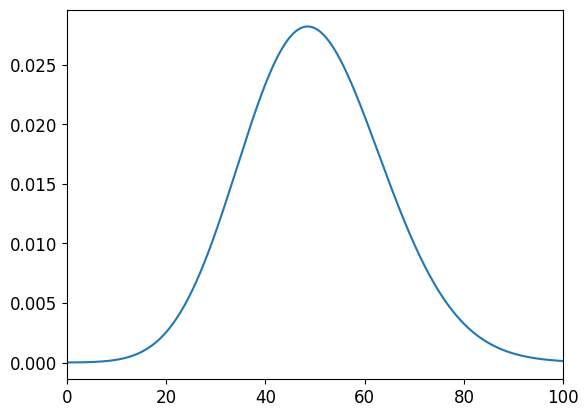

In [43]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,100])
ax.plot(x, y_poi)

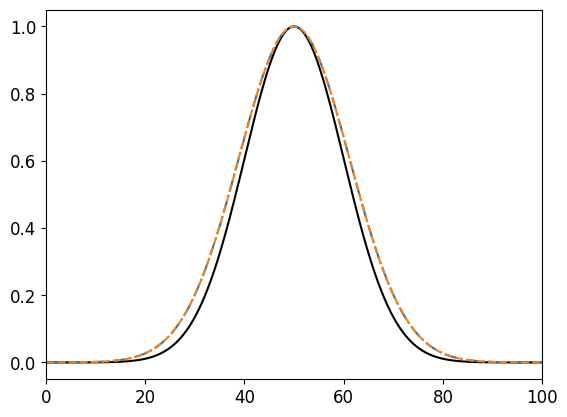

In [44]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,100])
ax.plot(x, y_p/y_p.max(), 'k')
ax.plot(x, y_gau/y_gau.max(), '-.')
ax.plot(x, gaussian_density(x, 50, np.sqrt(125))/gaussian_density(x, 50, np.sqrt(125)).max(), '--')

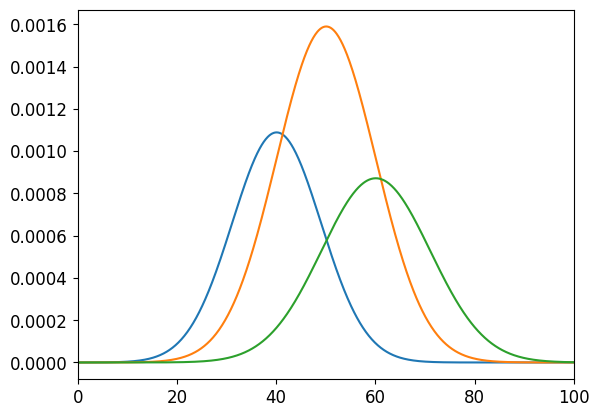

In [45]:
fig, ax = plt.subplots(1,1)
ax.set_xlim([0,100])
ax.plot(x, y_poi_lst[[400,500,600]].T);

In [46]:
popt, pcov = scipy.optimize.curve_fit(gaussian_density, x, y_poi, p0=(50, 10), bounds=([0.,1], [100., 50.]))
print(popt)

[49.24664962 14.12917836]


In [ ]:
x[649]

65.0

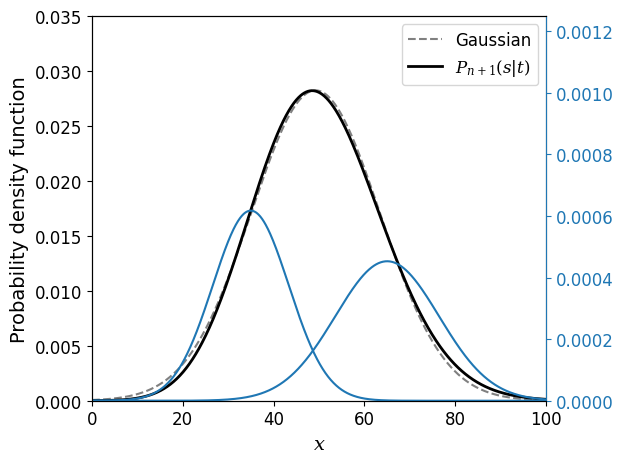

In [48]:
import config_matplotlib

fig, ax = plt.subplots(1,1)
ax.set_xlim([0,100])
ax_tw = ax.twinx()
# ax_tw.sharey(ax)
ax.plot(x, gaussian_density(x, *popt), c='gray', linestyle='--', label=r'Gaussian')
ax.plot(x, y_poi, c='k', linewidth=2, label=r'$P_{n+1}(s|t)$')

ax_tw.plot(x, y_poi_lst[[349,649]].T, c='C0')
ax.legend()

ax.set_xlabel(r'$x$')
ax.set_ylabel('Probability density function')
ax_tw.spines['right'].set_color('C0')
ax_tw.tick_params(axis='y', colors='C0')
ax.set_ylim([0.0, 0.035])
ax_tw.set_ylim([0.0, 0.00125])

fig.tight_layout()
fig.savefig(f'figures/P_s_given_t_eta{eta}.pdf', bbox_inches='tight')

In [53]:
(10/14.13)**2

0.5008592239987698